In [0]:
%pip install mlflow

Python interpreter will be restarted.
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Not uninstalling typing-extensions at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-a4cf6e82-22c5-4ef5-9214-660305660e49
    Can't uninstall 'typing-extensions'. No files were found to uninstall.
Python interpreter will be restarted.


In [0]:
import mlflow
mlflow.pyspark.ml.autolog()

In [0]:
# Loading the FaultDataset.csv file into the spark DF 'FaultDF'
FaultDF = spark.read.csv("/FileStore/tables/FaultDataset.csv",
                        header = "true",
                        inferSchema = "true")

In [0]:
# Checking row and columns count
display((FaultDF.count(), len(FaultDF.columns)))

(9292, 21)

In [0]:

# Checking sample records
FaultDF.display()

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,fault_detected
0.3503125,0.3496875,0.35,0.3459375,0.3475,0.3459375,0.341875,0.3434375,0.355,0.3553125,0.3459375,0.3525,0.3575,0.3590625,0.35875,0.3484375,0.3590625,0.35,0.3559375,0.3490625,0
0.5090625,0.484375,0.046875,0.071875,0.06,0.0634375,0.0575,0.0546875,0.0559375,0.058125,0.0628125,0.065625,0.0640625,0.0634375,0.0534375,0.084375,0.0615625,0.05375,0.076875,0.056875,0
0.0928125,0.0975,0.1096875,0.1025,0.09625,0.1053125,0.09875,0.098125,0.091875,0.0909375,0.09875,0.103125,0.1,0.1034375,0.1015625,0.0978125,0.0990625,0.10375,0.098125,0.1040625,0
0.09375,0.089375,0.091875,0.0996875,0.0909375,0.096875,0.0940625,0.096875,0.096875,0.099375,0.099375,0.0959375,0.0959375,0.0940625,0.09125,0.0996875,0.09375,0.0934375,0.0971875,0.094375,0
0.036875,0.0440625,0.038125,0.0428125,0.0353125,0.0340625,0.033125,0.0403125,0.0346875,0.036875,0.035625,0.03625,0.0409375,0.039375,0.035,0.040625,0.0384375,0.036875,0.04,0.0371875,0
0.135625,0.3034375,0.13875,0.140625,0.126875,0.130625,0.139375,0.143125,0.1290625,0.140625,0.1340625,0.1396875,0.1384375,0.1453125,0.1453125,0.1496875,0.1440625,0.1359375,0.1453125,0.14625,0
0.3446875,0.35125,0.3353125,0.3471875,0.34625,0.348125,0.3478125,0.3521875,0.3525,0.35125,0.3571875,0.360625,0.3640625,0.36625,0.3640625,0.3634375,0.3475,0.35375,0.1575,0.351875,0
0.036875,0.035625,0.03125,0.0375,0.0390625,0.034375,0.0315625,0.031875,0.0378125,0.0321875,0.0371875,0.038125,0.035,0.0353125,0.0325,0.03,0.0325,0.0321875,0.0321875,0.03125,0
0.0371875,0.039375,0.033125,0.04,0.04125,0.03875,0.035625,0.0384375,0.0378125,0.0365625,0.033125,0.0365625,0.03375,0.034375,0.0346875,0.04125,0.0365625,0.035,0.034375,0.0396875,0
0.3590625,0.3609375,0.360625,0.3590625,0.355,0.365,0.355625,0.358125,0.3575,0.3578125,0.355625,0.3584375,0.3521875,0.3459375,0.3521875,0.3509375,0.3525,0.35625,0.353125,0.3540625,0


In [0]:
# Create a view or table

temp_table_name = "FaultDataset"

FaultDF.createOrReplaceTempView(temp_table_name)

In [0]:
%sql
/* Query the created temp table in a SQL cell */
select * from `FaultDataset` LIMIT 10

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,fault_detected
0.3503125,0.3496875,0.35,0.3459375,0.3475,0.3459375,0.341875,0.3434375,0.355,0.3553125,0.3459375,0.3525,0.3575,0.3590625,0.35875,0.3484375,0.3590625,0.35,0.3559375,0.3490625,0
0.5090625,0.484375,0.046875,0.071875,0.06,0.0634375,0.0575,0.0546875,0.0559375,0.058125,0.0628125,0.065625,0.0640625,0.0634375,0.0534375,0.084375,0.0615625,0.05375,0.076875,0.056875,0
0.0928125,0.0975,0.1096875,0.1025,0.09625,0.1053125,0.09875,0.098125,0.091875,0.0909375,0.09875,0.103125,0.1,0.1034375,0.1015625,0.0978125,0.0990625,0.10375,0.098125,0.1040625,0
0.09375,0.089375,0.091875,0.0996875,0.0909375,0.096875,0.0940625,0.096875,0.096875,0.099375,0.099375,0.0959375,0.0959375,0.0940625,0.09125,0.0996875,0.09375,0.0934375,0.0971875,0.094375,0
0.036875,0.0440625,0.038125,0.0428125,0.0353125,0.0340625,0.033125,0.0403125,0.0346875,0.036875,0.035625,0.03625,0.0409375,0.039375,0.035,0.040625,0.0384375,0.036875,0.04,0.0371875,0
0.135625,0.3034375,0.13875,0.140625,0.126875,0.130625,0.139375,0.143125,0.1290625,0.140625,0.1340625,0.1396875,0.1384375,0.1453125,0.1453125,0.1496875,0.1440625,0.1359375,0.1453125,0.14625,0
0.3446875,0.35125,0.3353125,0.3471875,0.34625,0.348125,0.3478125,0.3521875,0.3525,0.35125,0.3571875,0.360625,0.3640625,0.36625,0.3640625,0.3634375,0.3475,0.35375,0.1575,0.351875,0
0.036875,0.035625,0.03125,0.0375,0.0390625,0.034375,0.0315625,0.031875,0.0378125,0.0321875,0.0371875,0.038125,0.035,0.0353125,0.0325,0.03,0.0325,0.0321875,0.0321875,0.03125,0
0.0371875,0.039375,0.033125,0.04,0.04125,0.03875,0.035625,0.0384375,0.0378125,0.0365625,0.033125,0.0365625,0.03375,0.034375,0.0346875,0.04125,0.0365625,0.035,0.034375,0.0396875,0
0.3590625,0.3609375,0.360625,0.3590625,0.355,0.365,0.355625,0.358125,0.3575,0.3578125,0.355625,0.3584375,0.3521875,0.3459375,0.3521875,0.3509375,0.3525,0.35625,0.353125,0.3540625,0


In [0]:
# Checking the schema
FaultDF.printSchema()

root
 |-- 1: double (nullable = true)
 |-- 2: double (nullable = true)
 |-- 3: double (nullable = true)
 |-- 4: double (nullable = true)
 |-- 5: double (nullable = true)
 |-- 6: double (nullable = true)
 |-- 7: double (nullable = true)
 |-- 8: double (nullable = true)
 |-- 9: double (nullable = true)
 |-- 10: double (nullable = true)
 |-- 11: double (nullable = true)
 |-- 12: double (nullable = true)
 |-- 13: double (nullable = true)
 |-- 14: double (nullable = true)
 |-- 15: double (nullable = true)
 |-- 16: double (nullable = true)
 |-- 17: double (nullable = true)
 |-- 18: double (nullable = true)
 |-- 19: double (nullable = true)
 |-- 20: double (nullable = true)
 |-- fault_detected: integer (nullable = true)



In [0]:
# Checking missing values in the data
for col in FaultDF.columns:
    print(col.ljust(20), FaultDF.filter(FaultDF[col].isNull()).count())

1                    0
2                    0
3                    0
4                    0
5                    0
6                    0
7                    0
8                    0
9                    0
10                   0
11                   0
12                   0
13                   0
14                   0
15                   0
16                   0
17                   0
18                   0
19                   0
20                   0
fault_detected       0


In [0]:
# Checking target class distribution
display(FaultDF
        .groupBy("fault_detected")
        .count())

fault_detected,count
1,4646
0,4646


In [0]:
# Min of all column values by target class
display(FaultDF.groupBy('fault_detected').min())

fault_detected,min(1),min(2),min(3),min(4),min(5),min(6),min(7),min(8),min(9),min(10),min(11),min(12),min(13),min(14),min(15),min(16),min(17),min(18),min(19),min(20),min(fault_detected)
1,0.024375,0.024375,0.024375,0.024375,0.024375,0.024375,0.024375,0.024375,0.024375,0.024375,0.024375,0.024375,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,1
0,0.025625,0.024375,0.0259375,0.0259375,0.0246875,0.025,0.025,0.0246875,0.024375,0.025,0.02625,0.025625,0.025,0.025,0.025,0.024375,0.024375,0.024375,0.024375,0.0259375,0


In [0]:
# Max of all column values by target class
display(FaultDF.groupBy('fault_detected').max())

fault_detected,max(1),max(2),max(3),max(4),max(5),max(6),max(7),max(8),max(9),max(10),max(11),max(12),max(13),max(14),max(15),max(16),max(17),max(18),max(19),max(20),max(fault_detected)
1,1.0809375,1.0809375,1.0809375,1.0809375,1.0809375,1.0809375,1.0809375,1.0809375,1.0809375,1.0809375,1.0809375,1.0809375,1.0809375,1.0809375,1.0809375,1.0809375,1.0809375,1.0809375,1.0809375,1.0809375,1
0,0.7684375,1.2134375,0.82875,0.786875,0.7621875,0.82875,0.82875,0.8203125,1.0709375,0.93125,1.0709375,1.2134375,0.82875,1.2134375,1.0709375,0.93125,0.73125,1.0709375,0.7240625,1.0709375,0


In [0]:
# Mean of all column values by target class
display(FaultDF.groupBy('fault_detected').mean())

fault_detected,avg(1),avg(2),avg(3),avg(4),avg(5),avg(6),avg(7),avg(8),avg(9),avg(10),avg(11),avg(12),avg(13),avg(14),avg(15),avg(16),avg(17),avg(18),avg(19),avg(20),avg(fault_detected)
1,0.5345139636246223,0.5351908227507541,0.5354065997632375,0.5359103933491173,0.5363514986009466,0.5362730036590614,0.5369834938656909,0.5378515120533786,0.5384589566293595,0.5390929697589341,0.539499973095136,0.5398922460180796,0.5410531909169192,0.5418817934782603,0.5424007210503661,0.5432684029272485,0.544029339754627,0.5447457490314256,0.5455314383340506,0.5465267165303486,1.0
0,0.14873264636246228,0.15007149967714162,0.1488361628282389,0.1483677491390444,0.1493353825871714,0.14938286967283676,0.1484459077701255,0.14828003928110214,0.14788702647438637,0.14875739883770997,0.14871509093844146,0.14807623493327596,0.14718346427034043,0.1478757264313388,0.14739917402066308,0.14840010223848485,0.14724043532070547,0.1467593090830818,0.1475128470727503,0.14681473310374513,0.0


Out[15]: <AxesSubplot:>

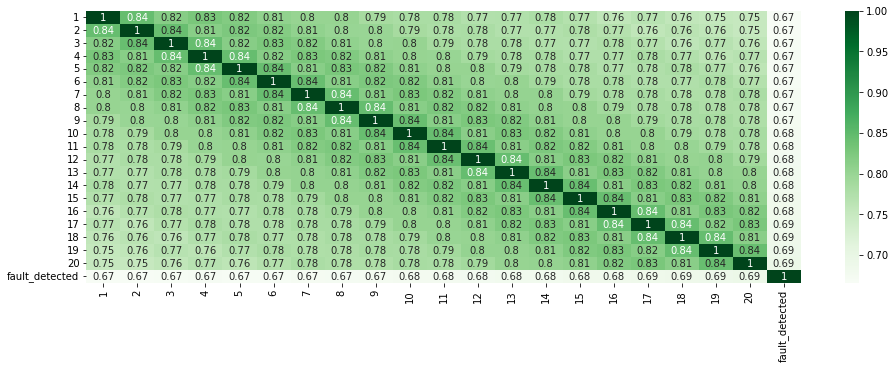

In [0]:
# Correlation analysis and heatmap creation
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# convert to vector column first
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=FaultDF.columns, outputCol=vector_col)
df_vector = assembler.transform(FaultDF).select(vector_col)

# get correlation matrix
matrix = Correlation.corr(df_vector, 'corr_features').collect()[0][0] 
corr_matrix = matrix.toArray().tolist() 
corr_matrix_df = pd.DataFrame(data=corr_matrix, columns = FaultDF.columns, index=FaultDF.columns) 

plt.figure(figsize=(16,5))  
sns.heatmap(corr_matrix_df, 
            xticklabels=corr_matrix_df.columns.values,
            yticklabels=corr_matrix_df.columns.values,  cmap="Greens", annot=True)

In [0]:
# Data transformation with vector assembling
vec_asmbl = VectorAssembler(inputCols= ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
 '13', '14', '15', '16', '17', '18', '19', '20'], outputCol='features')

FaultDF_transformed = vec_asmbl.transform(FaultDF).select('features', 'fault_detected')
display(FaultDF_transformed)

features,fault_detected
"Map(vectorType -> dense, length -> 20, values -> List(0.3503125, 0.3496875, 0.35, 0.3459375, 0.3475, 0.3459375, 0.341875, 0.3434375, 0.355, 0.3553125, 0.3459375, 0.3525, 0.3575, 0.3590625, 0.35875, 0.3484375, 0.3590625, 0.35, 0.3559375, 0.3490625))",0
"Map(vectorType -> dense, length -> 20, values -> List(0.5090625, 0.484375, 0.046875, 0.071875, 0.06, 0.0634375, 0.0575, 0.0546875, 0.0559375, 0.058125, 0.0628125, 0.065625, 0.0640625, 0.0634375, 0.0534375, 0.084375, 0.0615625, 0.05375, 0.076875, 0.056875))",0
"Map(vectorType -> dense, length -> 20, values -> List(0.0928125, 0.0975, 0.1096875, 0.1025, 0.09625, 0.1053125, 0.09875, 0.098125, 0.091875, 0.0909375, 0.09875, 0.103125, 0.1, 0.1034375, 0.1015625, 0.0978125, 0.0990625, 0.10375, 0.098125, 0.1040625))",0
"Map(vectorType -> dense, length -> 20, values -> List(0.09375, 0.089375, 0.091875, 0.0996875, 0.0909375, 0.096875, 0.0940625, 0.096875, 0.096875, 0.099375, 0.099375, 0.0959375, 0.0959375, 0.0940625, 0.09125, 0.0996875, 0.09375, 0.0934375, 0.0971875, 0.094375))",0
"Map(vectorType -> dense, length -> 20, values -> List(0.036875, 0.0440625, 0.038125, 0.0428125, 0.0353125, 0.0340625, 0.033125, 0.0403125, 0.0346875, 0.036875, 0.035625, 0.03625, 0.0409375, 0.039375, 0.035, 0.040625, 0.0384375, 0.036875, 0.04, 0.0371875))",0
"Map(vectorType -> dense, length -> 20, values -> List(0.135625, 0.3034375, 0.13875, 0.140625, 0.126875, 0.130625, 0.139375, 0.143125, 0.1290625, 0.140625, 0.1340625, 0.1396875, 0.1384375, 0.1453125, 0.1453125, 0.1496875, 0.1440625, 0.1359375, 0.1453125, 0.14625))",0
"Map(vectorType -> dense, length -> 20, values -> List(0.3446875, 0.35125, 0.3353125, 0.3471875, 0.34625, 0.348125, 0.3478125, 0.3521875, 0.3525, 0.35125, 0.3571875, 0.360625, 0.3640625, 0.36625, 0.3640625, 0.3634375, 0.3475, 0.35375, 0.1575, 0.351875))",0
"Map(vectorType -> dense, length -> 20, values -> List(0.036875, 0.035625, 0.03125, 0.0375, 0.0390625, 0.034375, 0.0315625, 0.031875, 0.0378125, 0.0321875, 0.0371875, 0.038125, 0.035, 0.0353125, 0.0325, 0.03, 0.0325, 0.0321875, 0.0321875, 0.03125))",0
"Map(vectorType -> dense, length -> 20, values -> List(0.0371875, 0.039375, 0.033125, 0.04, 0.04125, 0.03875, 0.035625, 0.0384375, 0.0378125, 0.0365625, 0.033125, 0.0365625, 0.03375, 0.034375, 0.0346875, 0.04125, 0.0365625, 0.035, 0.034375, 0.0396875))",0
"Map(vectorType -> dense, length -> 20, values -> List(0.3590625, 0.3609375, 0.360625, 0.3590625, 0.355, 0.365, 0.355625, 0.358125, 0.3575, 0.3578125, 0.355625, 0.3584375, 0.3521875, 0.3459375, 0.3521875, 0.3509375, 0.3525, 0.35625, 0.353125, 0.3540625))",0


In [0]:
# Splitting the data into train and test in the ration of 80:20
FaultDF_train, FaultDF_test = FaultDF_transformed.randomSplit([0.8, 0.2], seed=17)

# Check that training set has around 80% of records
training_ratio = FaultDF_train.count() / FaultDF_transformed.count()
display(training_ratio)

0.7955230305639259

In [0]:
# Setting up MLFlow experiment and logging in the model training and performance values 
import mlflow
experiment_name = "/Shared/VibrationSensorsFaultPredictinExperiment/"
mlflow.set_experiment(experiment_name)

from pyspark.ml.classification import DecisionTreeClassifier
with mlflow.start_run():
    # Create a classifier object and fit to the training data
    tree = DecisionTreeClassifier(labelCol='fault_detected')
    tree_model = tree.fit(FaultDF_train)

    # Create predictions for the testing data and take a look at the predictions
    prediction = tree_model.transform(FaultDF_test)
    
    TN = prediction.filter('prediction = 0 AND fault_detected = prediction').count()
    TP = prediction.filter('prediction = 1 AND fault_detected = prediction').count()
    FN = prediction.filter('prediction = 0 AND fault_detected = 1').count()
    FP = prediction.filter('prediction = 1 AND fault_detected = 0').count()
    from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

    # Calculate precision and recall
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)

    # Accuracy measures the proportion of correct predictions
    accuracy = (TN + TP) / (TN + TP + FN + FP)

    # Find weighted precision
    multi_evaluator = MulticlassClassificationEvaluator(labelCol='fault_detected')
    weighted_precision = multi_evaluator.evaluate(prediction, {multi_evaluator.metricName: "weightedPrecision"})

    # Find AUC
    binary_evaluator = BinaryClassificationEvaluator(labelCol='fault_detected')
    auc = binary_evaluator.evaluate(prediction, {binary_evaluator.metricName: "areaUnderROC"})


    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("auc", auc)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("weighted_precision", weighted_precision)

display(prediction.select('fault_detected', 'prediction', 'probability'))
print('Decision Tree Classifier Performance')
print('accuracy = {:.2f}\nauc = {:.2f}'.format(accuracy, auc))
print('precision = {:.2f}\nrecall   = {:.2f}'.format(precision, recall))
print('weighted precision = {:.2f}'.format(weighted_precision))

2023/04/24 09:30:33 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


fault_detected,prediction,probability
1,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.955709711846318, 0.04429028815368197))"
1,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.955709711846318, 0.04429028815368197))"
1,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.955709711846318, 0.04429028815368197))"
1,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.955709711846318, 0.04429028815368197))"
1,1.0,"Map(vectorType -> dense, length -> 2, values -> List(3.7678975131876413E-4, 0.9996232102486813))"
0,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.955709711846318, 0.04429028815368197))"
0,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.955709711846318, 0.04429028815368197))"
0,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.955709711846318, 0.04429028815368197))"
0,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.955709711846318, 0.04429028815368197))"
1,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.955709711846318, 0.04429028815368197))"


Decision Tree Classifier Performance
accuracy = 0.95
auc = 0.80
precision = 0.98
recall   = 0.93
weighted precision = 0.96


In [0]:
from pyspark.ml.tuning import ParamGridBuilder

# Create a parameter grid

parameters = ParamGridBuilder()\
.addGrid(tree.impurity,["gini","entropy"])\
.addGrid(tree.maxDepth, [3,5,7])\
.addGrid(tree.maxBins, [16,32,64])\
.build()

In [0]:
from pyspark.ml.tuning import TrainValidationSplit

#define TrainValidationSplit

tvs = TrainValidationSplit()\
.setSeed(100)\
.setTrainRatio(0.75)\
.setEstimatorParamMaps(parameters)\
.setEstimator(tree)\
.setEvaluator(multi_evaluator)

In [0]:
gridsearchModel = tvs.fit(FaultDF_train)

2023/04/24 10:07:29 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '9ff7a73b96614c81904091b4d8489ee9', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/04/24 10:08:22 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2023/04/24 10:09:30 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


In [0]:
#select best model
bestModel = gridsearchModel.bestModel
print("Parameters for the best Models:")
print("Maxdepth Parameter: %g" %bestModel.getMaxDepth())
print("Impurity Parameter: %s" %bestModel.getImpurity())
print("MaxBins Parameter: %g" %bestModel.getMaxBins())

Parameters for the best Models:
Maxdepth Parameter: 7
Impurity Parameter: entropy
MaxBins Parameter: 64


In [0]:
import mlflow
logged_model = 'runs:/9ff7a73b96614c81904091b4d8489ee9/best_model'

# Load model
loaded_model = mlflow.spark.load_model(logged_model)

# Perform inference via model.transform()
loaded_model.transform(FaultDF_test)

2023/04/24 10:26:24 INFO mlflow.spark: 'runs:/9ff7a73b96614c81904091b4d8489ee9/best_model' resolved as 'dbfs:/databricks/mlflow-tracking/3331666254411910/9ff7a73b96614c81904091b4d8489ee9/artifacts/best_model'
2023/04/24 10:26:27 INFO mlflow.spark: URI 'runs:/9ff7a73b96614c81904091b4d8489ee9/best_model/sparkml' does not point to the current DFS.
2023/04/24 10:26:27 INFO mlflow.spark: File 'runs:/9ff7a73b96614c81904091b4d8489ee9/best_model/sparkml' not found on DFS. Will attempt to upload the file.
2023/04/24 10:26:29 INFO mlflow.spark: Copied SparkML model to /tmp/mlflow/773ab47c-ba2a-41a3-aa22-8a5e818dcf8a
Out[48]: DataFrame[features: vector, fault_detected: int, rawPrediction: vector, probability: vector, prediction: double]

##Logistic Regression Model

In [0]:
# Training and testing logitstic regression
from pyspark.ml.classification import LogisticRegression
logistic = LogisticRegression(labelCol='fault_detected').fit(FaultDF_train)

# Create a predictions for the test data and show confusion matrix
prediction = logistic.transform(FaultDF_train)
display(prediction.groupBy("fault_detected", "prediction").count())

2023/04/24 09:33:14 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '687297a6f5654dfd8dc37d618f87b368', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/04/24 09:33:23 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


fault_detected,prediction,count
1,0.0,679
0,0.0,3022
1,1.0,3005
0,1.0,686


In [0]:
# Performance evaluation of Logistic Regression
TN = prediction.filter('prediction = 0 AND fault_detected = prediction').count()
TP = prediction.filter('prediction = 1 AND fault_detected = prediction').count()
FN = prediction.filter('prediction = 0 AND fault_detected = 1').count()
FP = prediction.filter('prediction = 1 AND fault_detected = 0').count()
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

# Calculate precision and recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)

# Accuracy measures the proportion of correct predictions
accuracy = (TN + TP) / (TN + TP + FN + FP)

# Find weighted precision
multi_evaluator = MulticlassClassificationEvaluator(labelCol='fault_detected')
weighted_precision = multi_evaluator.evaluate(prediction, {multi_evaluator.metricName: "weightedPrecision"})

# Find AUC
binary_evaluator = BinaryClassificationEvaluator(labelCol='fault_detected')
auc = binary_evaluator.evaluate(prediction, {binary_evaluator.metricName: "areaUnderROC"})
print('Logistic Regression Performance')
print('accuracy = {:.2f}\nauc = {:.2f}'.format(accuracy, auc))
print('precision = {:.2f}\nrecall   = {:.2f}'.format(precision, recall))
print('weighted precision = {:.2f}'.format(weighted_precision))

Logistic Regression Performance
accuracy = 0.82
auc = 0.93
precision = 0.81
recall   = 0.82
weighted precision = 0.82
